Week 5


Introduction where you discuss the business problem and who would be interested in this project.

Where to start our Korean bbq business in Clementi, Singapore to attract people to visit.

Company trying to open a Korean restaurants in Clementi, Singapore. 
Target Audience will be student studying in Singapore university of Social Sciences, Singapore Institute of Management , Ngee Ann Polytechnic.

Data where you describe the data that will be used to solve the problem and the source of the data.
I gather all the korean restaurant near the school using foursquare and using bs4 to extract all the rating for the korean restaurant gather using 4 square and create meaningful visualization and analyze the feasibility of openning korean restaurant near schools.

### Import necessary Libraries

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Folium installed
Libraries imported.


### Define Foursquare Credentials and Version

##### Make sure that you have created a Foursquare developer account and have your credentials handy

In [2]:
CLIENT_ID = 'IL5L2RYXRPC3TNKV3LZ4M2BPIBYDHO4KYBU2EPSML0RZX2YP' # your Foursquare ID
CLIENT_SECRET = '0KNMNL4NLZFR44LM0W3DOG1XA1UWOXDIMQZDXV0KN5GRHHGR' # your Foursquare Secret
VERSION = '20200211'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IL5L2RYXRPC3TNKV3LZ4M2BPIBYDHO4KYBU2EPSML0RZX2YP
CLIENT_SECRET:0KNMNL4NLZFR44LM0W3DOG1XA1UWOXDIMQZDXV0KN5GRHHGR


#### Let's again assume that you are staying at the Conrad hotel. So let's start by converting the Contrad Hotel's address to its latitude and longitude coordinates.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>foursquare_agent</em>, as shown below.

In [3]:
address = '461 Clementi Rd, Singapore 599491'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

1.32884 103.77636


<a id="item1"></a>

## 1. Search for a specific venue category
> `https://api.foursquare.com/v2/venues/`**search**`?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&ll=`**LATITUDE**`,`**LONGITUDE**`&v=`**VERSION**`&query=`**QUERY**`&radius=`**RADIUS**`&limit=`**LIMIT**

#### Now, let's assume that it is lunch time, and you are craving Italian food. So, let's define a query to search for Italian food that is within 500 metres from the Conrad Hotel. 

In [4]:
search_query = 'korean'
radius = 2000
print(search_query + ' .... OK!')

korean .... OK!


#### Define the corresponding URL

In [5]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=IL5L2RYXRPC3TNKV3LZ4M2BPIBYDHO4KYBU2EPSML0RZX2YP&client_secret=0KNMNL4NLZFR44LM0W3DOG1XA1UWOXDIMQZDXV0KN5GRHHGR&ll=1.32884,103.77636&v=20200211&query=korean&radius=2000&limit=30'

#### Send the GET Request and examine the results

In [6]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e4cad3cb4b684001b2db7c0'},
 'response': {'venues': [{'id': '53d249cc498e53e973aa85a0',
    'name': '名家 (Ming Jia) 명가 II Korean BBQ',
    'location': {'address': 'B1-55, Bukit Timah Plaza',
     'crossStreet': '1 Jalan Anak Bukit',
     'lat': 1.3388956709082542,
     'lng': 103.77917633494214,
     'labeledLatLngs': [{'label': 'display',
       'lat': 1.3388956709082542,
       'lng': 103.77917633494214}],
     'distance': 1162,
     'postalCode': '588996',
     'cc': 'SG',
     'city': 'Singapore',
     'country': 'Singapore',
     'formattedAddress': ['B1-55, Bukit Timah Plaza (1 Jalan Anak Bukit)',
      '588996',
      'Singapore']},
    'categories': [{'id': '4bf58dd8d48988d113941735',
      'name': 'Korean Restaurant',
      'pluralName': 'Korean Restaurants',
      'shortName': 'Korean',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/korean_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1582

#### Get relevant part of JSON and transform it into a *pandas* dataframe

In [7]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d113941735', 'name': 'K...",False,53d249cc498e53e973aa85a0,"B1-55, Bukit Timah Plaza",SG,Singapore,Singapore,1 Jalan Anak Bukit,1162,"[B1-55, Bukit Timah Plaza (1 Jalan Anak Bukit)...","[{'label': 'display', 'lat': 1.338895670908254...",1.338896,103.779176,NaN,588996,NaN,名家 (Ming Jia) 명가 II Korean BBQ,v-1582083535
1,"[{'id': '4bf58dd8d48988d113941735', 'name': 'K...",False,4c08dd6d7e3fc9282fecf082,"B1-07/19, Bukit Timah Plaza",SG,Singapore,Singapore,1 Jalan Anak Bukit,1132,"[B1-07/19, Bukit Timah Plaza (1 Jalan Anak Buk...","[{'label': 'display', 'lat': 1.338786016176664...",1.338786,103.778506,NaN,588996,NaN,Ming Jia 名家 Korean Food,v-1582083535
2,"[{'id': '4bf58dd8d48988d113941735', 'name': 'K...",False,4c010d85cf3aa5930e5dccb0,"19 Lor Kilat, #01-02",SG,Singapore,Singapore,NaN,1393,"[19 Lor Kilat, #01-02, 598120, Singapore]","[{'label': 'display', 'lat': 1.341074097878049...",1.341074,103.773715,Bukit Timah,598120,NaN,Woorinara Korean Restaurant,v-1582083535
3,"[{'id': '4bf58dd8d48988d113941735', 'name': 'K...",False,574e82f1498e44b7c8374534,106 Clementi Street 12,SG,Singapore,Singapore,Sunset Way,1034,"[106 Clementi Street 12 (Sunset Way), Singapore]","[{'label': 'display', 'lat': 1.321923, 'lng': ...",1.321923,103.770146,NaN,NaN,NaN,Ho Ho Korean Restaurant,v-1582083535
4,"[{'id': '4bf58dd8d48988d113941735', 'name': 'K...",False,4e142e03aeb7727f20ff9f6c,#04-03 Beauty World Centre,SG,Singapore,Singapore,144 Upper Bukit Timah Rd.,1508,[#04-03 Beauty World Centre (144 Upper Bukit T...,"[{'label': 'display', 'lat': 1.342391500421260...",1.342392,103.776348,NaN,588177,NaN,Pink Candy Korean Snack Bar Cafe,v-1582083535


#### Define information of interest and filter dataframe

In [8]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,名家 (Ming Jia) 명가 II Korean BBQ,Korean Restaurant,"B1-55, Bukit Timah Plaza",SG,Singapore,Singapore,1 Jalan Anak Bukit,1162,"[B1-55, Bukit Timah Plaza (1 Jalan Anak Bukit)...","[{'label': 'display', 'lat': 1.338895670908254...",1.338896,103.779176,NaN,588996,NaN,53d249cc498e53e973aa85a0
1,Ming Jia 名家 Korean Food,Korean Restaurant,"B1-07/19, Bukit Timah Plaza",SG,Singapore,Singapore,1 Jalan Anak Bukit,1132,"[B1-07/19, Bukit Timah Plaza (1 Jalan Anak Buk...","[{'label': 'display', 'lat': 1.338786016176664...",1.338786,103.778506,NaN,588996,NaN,4c08dd6d7e3fc9282fecf082
2,Woorinara Korean Restaurant,Korean Restaurant,"19 Lor Kilat, #01-02",SG,Singapore,Singapore,NaN,1393,"[19 Lor Kilat, #01-02, 598120, Singapore]","[{'label': 'display', 'lat': 1.341074097878049...",1.341074,103.773715,Bukit Timah,598120,NaN,4c010d85cf3aa5930e5dccb0
3,Ho Ho Korean Restaurant,Korean Restaurant,106 Clementi Street 12,SG,Singapore,Singapore,Sunset Way,1034,"[106 Clementi Street 12 (Sunset Way), Singapore]","[{'label': 'display', 'lat': 1.321923, 'lng': ...",1.321923,103.770146,NaN,NaN,NaN,574e82f1498e44b7c8374534
4,Pink Candy Korean Snack Bar Cafe,Korean Restaurant,#04-03 Beauty World Centre,SG,Singapore,Singapore,144 Upper Bukit Timah Rd.,1508,[#04-03 Beauty World Centre (144 Upper Bukit T...,"[{'label': 'display', 'lat': 1.342391500421260...",1.342392,103.776348,NaN,588177,NaN,4e142e03aeb7727f20ff9f6c
5,Korean Rice Cake,Food & Drink Shop,"B1-29, Beauty World Centre",SG,Singapore,Singapore,144 Upper Bukit Timah Rd.,1495,"[B1-29, Beauty World Centre (144 Upper Bukit T...","[{'label': 'display', 'lat': 1.342269, 'lng': ...",1.342269,103.775891,NaN,588177,NaN,4ccba44b2dc43704e87dc108
6,Joo Mak Korean Restaurant,Korean Restaurant,"#04-01, Beauty World Centre",SG,Singapore,Singapore,144 Upper Bukit Timah Road,1505,"[#04-01, Beauty World Centre (144 Upper Bukit ...","[{'label': 'display', 'lat': 1.342362594072116...",1.342363,103.776126,NaN,588177,NaN,4c652be9c74c1b8df751b383
7,Daessiksin Korean BBQ Buffet,BBQ Joint,Clementi Mall,SG,NaN,Singapore,NaN,2086,"[Clementi Mall, 122441, Singapore]","[{'label': 'display', 'lat': 1.3147595, 'lng':...",1.314760,103.763990,NaN,122441,NaN,596df35c10345b123c4ad0a7
8,Korean Pub Aunt,Korean Restaurant,NaN,SG,NaN,Singapore,NaN,1068,[Singapore],"[{'label': 'display', 'lat': 1.321999, 'lng': ...",1.321999,103.769623,NaN,NaN,NaN,553f7318498edef6a191ce99
9,Zzang Korean Food,Korean Restaurant,"#02-K46, Bukit Timah Plaza",SG,Singapore,Singapore,1 Jalan Anak Bukit,1133,"[#02-K46, Bukit Timah Plaza (1 Jalan Anak Buki...","[{'label': 'display', 'lat': 1.338701769433788...",1.338702,103.778899,NaN,588996,NaN,52e35023498eff0335ff63ad


#### Let's visualize the Korean restaurants that are nearby

In [104]:
dataframe_filtered.name

0            名家 (Ming Jia) 명가 II Korean BBQ
1                   Ming Jia 名家 Korean Food
2               Woorinara Korean Restaurant
3                   Ho Ho Korean Restaurant
4          Pink Candy Korean Snack Bar Cafe
5                          Korean Rice Cake
6                 Joo Mak Korean Restaurant
7              Daessiksin Korean BBQ Buffet
8                           Korean Pub Aunt
9                         Zzang Korean Food
10    회랑고기랑 Korean Seafood & BBQ Restaurant
11                              Makan Place
12           Nunsongyee Korean Dessert Cafe
13                       Mr Kim Korean Food
14        Korean Cuisine @ BLk 442 Clementi
15        Korean massage @ 108 Jln Darmawan
16            Onlyou Korean Language School
17                           Korean Cuisine
18        Bing Go Jung Korean Dessert House
19      Ga Ya Guem Korean Family Restaurant
20                 Madang Korean Restaurant
21         2D1N Soju Bang Korean Restaurant
22                      Don Bang

In [164]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='SIM',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [141]:
import requests
from bs4 import BeautifulSoup
import re
   
#dataframe_filtered['name']

masterdata = {}

for i in dataframe_filtered['name']:
    rquery = i
    query = rquery.replace(" ","+")
    query = "https://www.google.com/search?q=" + query +"+"+ location
    print(query)
    r = requests.get(query)
    html_doc = r.text
    #print(html_doc)

    soup = BeautifulSoup(html_doc,"html.parser")
    
    df2 = dataframe_filtered[(dataframe_filtered.name == i)]
    x = df2['distance'].iloc[0]
    print(x)

    #print(soup.find(string=re.compile("Rated")))
    try:
        rating = soup.find("div", class_="Hk2yDb KsR1A")["aria-label"]
    except:
        rating = "none"
    masterdata[rquery] = rating[5:8],x    
    print(rating[5:8])

https://www.google.com/search?q=名家+(Ming+Jia)+명가+II+Korean+BBQ+Clementi
1162
4.2
https://www.google.com/search?q=Ming+Jia+名家+Korean+Food+Clementi
1132
4.0
https://www.google.com/search?q=Woorinara+Korean+Restaurant+Clementi
1393
4.0
https://www.google.com/search?q=Ho+Ho+Korean+Restaurant+Clementi
1034
4.4
https://www.google.com/search?q=Pink+Candy+Korean+Snack+Bar+Cafe+Clementi
1508
3.8
https://www.google.com/search?q=Korean+Rice+Cake+Clementi
1495
4.5
https://www.google.com/search?q=Joo+Mak+Korean+Restaurant+Clementi
1505
4.0
https://www.google.com/search?q=Daessiksin+Korean+BBQ+Buffet+Clementi
2086
3.9
https://www.google.com/search?q=Korean+Pub+Aunt+Clementi
1068
4.0
https://www.google.com/search?q=Zzang+Korean+Food+Clementi
1133
3.3
https://www.google.com/search?q=회랑고기랑+Korean+Seafood+&+BBQ+Restaurant+Clementi
1278
4.6
https://www.google.com/search?q=Makan+Place+Clementi
433
3.0
https://www.google.com/search?q=Nunsongyee+Korean+Dessert+Cafe+Clementi
1026
3.8
https://www.google.com/s

<a id="item2"></a>

In [142]:
masterdata

{'名家 (Ming Jia) 명가 II Korean BBQ': ('4.2', 1162),
 'Ming Jia 名家 Korean Food': ('4.0', 1132),
 'Woorinara Korean Restaurant': ('4.0', 1393),
 'Ho Ho Korean Restaurant': ('4.4', 1034),
 'Pink Candy Korean Snack Bar Cafe': ('3.8', 1508),
 'Korean Rice Cake': ('4.5', 1495),
 'Joo Mak Korean Restaurant': ('4.0', 1505),
 'Daessiksin Korean BBQ Buffet': ('3.9', 2086),
 'Korean Pub Aunt': ('4.0', 1068),
 'Zzang Korean Food': ('3.3', 1133),
 '회랑고기랑 Korean Seafood & BBQ Restaurant': ('4.6', 1278),
 'Makan Place': ('3.0', 433),
 'Nunsongyee Korean Dessert Cafe': ('3.8', 1026),
 'Mr Kim Korean Food': ('4.4', 1159),
 'Korean Cuisine @ BLk 442 Clementi': ('4.4', 1891),
 'Korean massage @ 108 Jln Darmawan': ('4.5', 2020),
 'Onlyou Korean Language School': ('5.0', 1313),
 'Korean Cuisine': ('4.4', 2145),
 'Bing Go Jung Korean Dessert House': ('3.7', 1087),
 'Ga Ya Guem Korean Family Restaurant': ('4.0', 1604),
 'Madang Korean Restaurant': ('4.4', 1344),
 '2D1N Soju Bang Korean Restaurant': ('3.8', 136

In [144]:
dfmaster =  pd.DataFrame.from_dict(masterdata)
display(dfmaster)

,名家 (Ming Jia) 명가 II Korean BBQ,Ming Jia 名家 Korean Food,Woorinara Korean Restaurant,Ho Ho Korean Restaurant,Pink Candy Korean Snack Bar Cafe,Korean Rice Cake,Joo Mak Korean Restaurant,Daessiksin Korean BBQ Buffet,Korean Pub Aunt,Zzang Korean Food,...,Madang Korean Restaurant,2D1N Soju Bang Korean Restaurant,Don Bang Korean BBQ,G Study Korean School,korean snow flake desert,Maru Buffet Korean BBQ,Hanssik Korean Bbq Restaurant,NunSongYee 눈송이 Korean Dessert Cafe,NTUC FoodFare,Koryo Mart
0,4.2,4.0,4.0,4.4,3.8,4.5,4.0,3.9,4.0,3.3,...,4.4,3.8,4.4,5.0,3.9,4.1,3.9,3.8,3.7,4.0
1,1162,1132,1393,1034,1508,1495,1505,2086,1068,1133,...,1344,1365,1508,1520,2404,1610,2049,1463,2073,1381


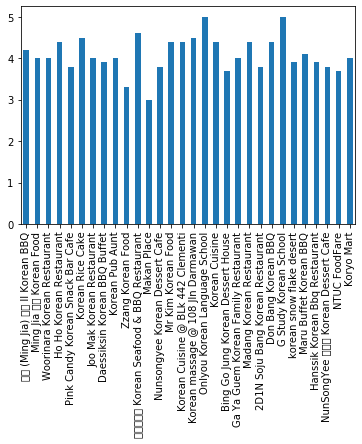

In [155]:
import matplotlib.pyplot as plt
row = dfmaster.iloc[0]
row1 =row.astype(float)
row1.plot(kind='bar')
plt.show()

In [172]:
# Nearest place that have korean cusine
nearest  = dataframe_filtered['distance'].min()

dfnear = dataframe_filtered[(dataframe_filtered.distance == nearest)]

print(dfnear.name.iloc[0])


Makan Place


Based on graph and the data, I would suggest my company to rethink about opening korean restuarant to attract student as there are alot of korean bbq restuarant nearby and most of them have good rating (above 4) . If company insist in trying to open korean bbq restuarant to attract student, I would suggest them to open at King Albert park which is opposite the 2 schools and is a walkable distance. Also I would suggest my company to research more about Don Bang Korean BBQ,Korean Rice Cake and learn how they managed to get a rating of 4.4 stars and 4.5 stars. Reason why I exclude the 5 star, the data is not relevant to korean cuisine as it is school rather than restuarant.